In [1]:
import folium

In [2]:
import os

In [3]:
import numpy as np

In [4]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

In [5]:
import geopandas as gpd

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
from shapely.geometry import MultiPolygon, Polygon

In [9]:
import rasterio as rio

In [10]:
from rasterio.plot import show

In [11]:
import rasterio.mask

In [12]:
import fiona

In [13]:
api = SentinelAPI('godzy', 'projekatsentinel', 'https://scihub.copernicus.eu/dhus')

In [14]:
mongu = gpd.read_file('zambia_mongu.shp')

In [15]:
emptymap = folium.Map([-15.260806,23.192222], zoom_start=8)
folium.GeoJson(mongu).add_to(emptymap)
emptymap

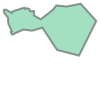

In [16]:
footprint = None
for i in mongu['geometry']:
    footprint = i
    
footprint = footprint.simplify(0.01, preserve_topology = True)
footprint

In [17]:
products = api.query(footprint,
                    date = ('20200101', '20200110'),
                    platformname = 'Sentinel-2',
                    cloudcoverpercentage = (0,50))

In [18]:
len(products)

2

In [19]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending = True)
products_gdf

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,size,filename,level1cpdiidentifier,identifier,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,geometry
15e716a7-429d-452d-a259-bd1628912b92,S2A_MSIL2A_20200109T083321_N0213_R021_T34LFH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-01-09T08:33:21.024Z, Instrument: MS...",2020-01-09 08:33:21.024,2020-01-09 08:33:21.024,2020-01-09 17:38:43.472,23756,21,...,978.29 MB,S2A_MSIL2A_20200109T083321_N0213_R021_T34LFH_2...,S2A_OPER_MSI_L1C_TL_EPAE_20200109T100015_A0237...,S2A_MSIL2A_20200109T083321_N0213_R021_T34LFH_2...,15e716a7-429d-452d-a259-bd1628912b92,NaT,NaN,NaN,NaN,"MULTIPOLYGON (((21.93635 -16.36716, 22.69139 -..."
08cb495b-297e-458a-91bf-840491cbf204,S2A_MSIL1C_20200109T083321_N0208_R021_T34LFH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-01-09T08:33:21.024Z, Instrument: MS...",2020-01-09 08:33:21.024,2020-01-09 08:33:21.024,2020-01-09 17:08:22.303,23756,21,...,720.89 MB,S2A_MSIL1C_20200109T083321_N0208_R021_T34LFH_2...,S2A_OPER_MSI_L1C_TL_EPAE_20200109T100015_A0237...,S2A_MSIL1C_20200109T083321_N0208_R021_T34LFH_2...,08cb495b-297e-458a-91bf-840491cbf204,2020-01-09 08:33:21.024,INS-NOBS,34LFH,LH34F,"MULTIPOLYGON (((21.93635 -16.36716, 22.69139 -..."


In [20]:
api.download('15e716a7-429d-452d-a259-bd1628912b92')

{'id': '15e716a7-429d-452d-a259-bd1628912b92',
 'title': 'S2A_MSIL2A_20200109T083321_N0213_R021_T34LFH_20200109T110531',
 'size': 1025866357,
 'md5': '12E9CB0983E94E11F9132F4CF9B20722',
 'date': datetime.datetime(2020, 1, 9, 8, 33, 21, 24000),
 'footprint': 'POLYGON((22.914812173342668 -15.368278114055826,22.896308940381115 -15.450804565570335,22.862973731325216 -15.598945605372842,22.82967221413924 -15.747260839013387,22.796327162813988 -15.895642675922456,22.76299801115437 -16.04406154810207,22.729550343724007 -16.192485351910225,22.696130265510387 -16.34093415461011,22.691387288940973 -16.361964720269942,21.93634686752007 -16.36716418336051,21.93177460997978 -15.37464792897223,22.914812173342668 -15.368278114055826))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('15e716a7-429d-452d-a259-bd1628912b92')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 1, 9, 17, 39, 5, 196000),
 'Ingestion Date': datetime.datetime(2020, 1, 9, 17, 38, 43, 472000),
 'p

In [21]:
R60 = 'S2A_MSIL2A_20200109T083321_N0213_R021_T34LFH_20200109T110531/GRANULE/L2A_T34LFH_A023756_20200109T084305/IMG_DATA/R60m'

In [22]:
tci = rio.open(R60+'/T34LFH_20200109T083321_TCI_60m.jp2')

In [23]:
tci.count, tci.width, tci.height

(3, 1830, 1830)

In [24]:
b4 = rio.open(R60+'/T34LFH_20200109T083321_B04_60m.jp2')
b3 = rio.open(R60+'/T34LFH_20200109T083321_B03_60m.jp2')
b2 = rio.open(R60+'/T34LFH_20200109T083321_B02_60m.jp2')

In [25]:
b4.count, b4.width, b4.height

(1, 1830, 1830)

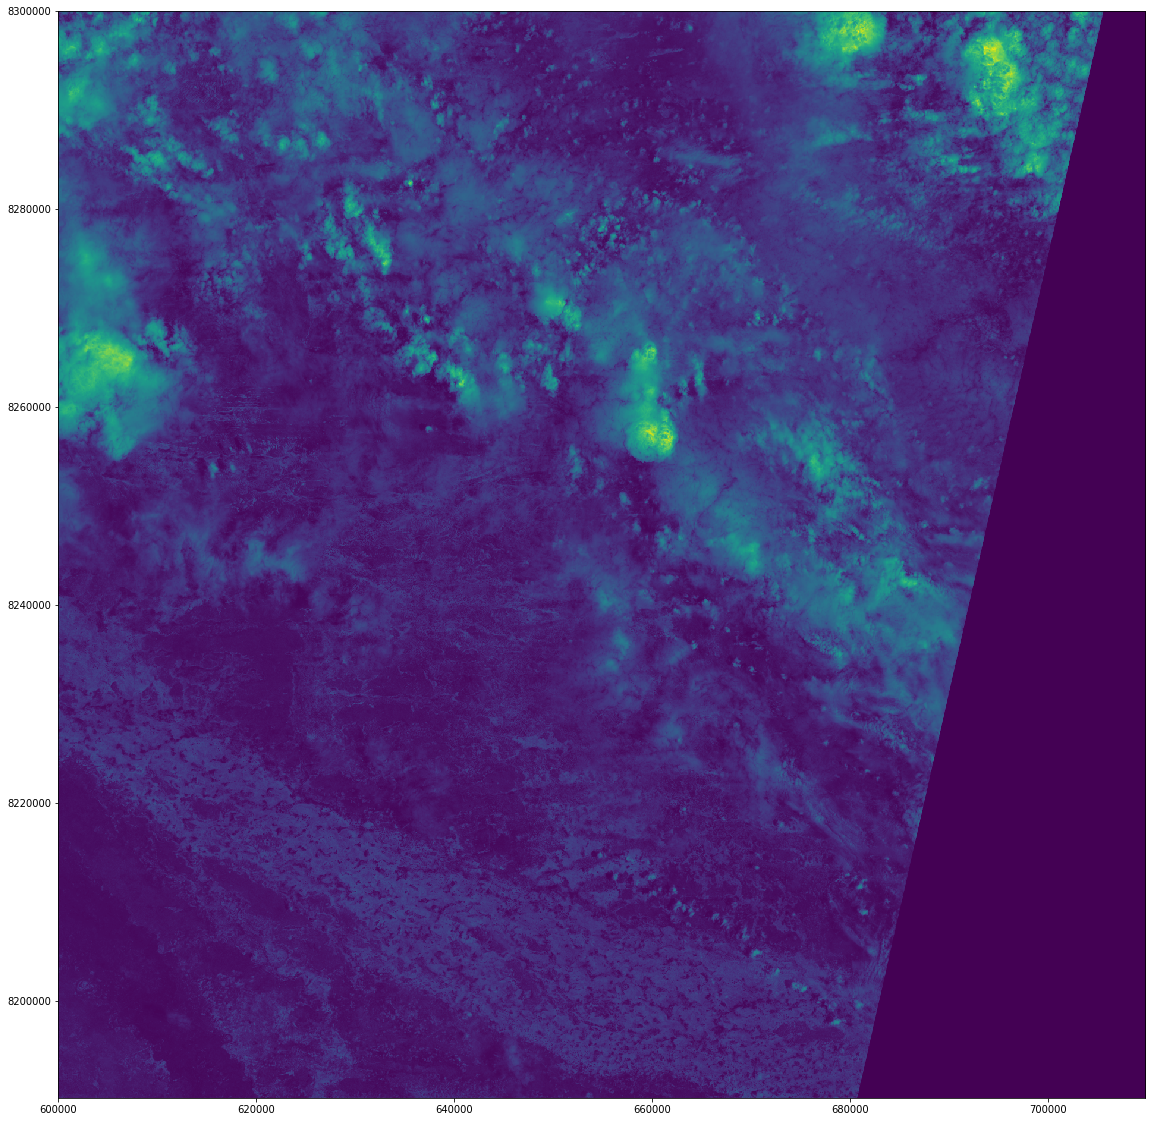

In [26]:
fig, ax = plt.subplots(1, figsize = (20,20))
show(b4, ax=ax)
plt.show()

In [27]:
with rio.open('RGB.tiff', 'w', driver='Gtiff', width=b4.width, height=b4.height,
             count=3, crs=b4.crs, transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1)
    rgb.write(b4.read(1),2)
    rgb.write(b4.read(1),3)
    rgb.close()

In [28]:
b4.crs

CRS.from_epsg(32734)

In [29]:
mongu_proj = mongu.to_crs('EPSG:32734')

In [47]:
with rio.open('RGB.tiff') as src:
    out_image, out_transform = rio.mask.mask(src, mongu_proj.geometry, crop=True)
    out_meta = src.meta.copy()
    out_meta.update({'driver': 'GTiff',
                    'height': out_image.shape[1],
                    'width': out_image.shape[2],
                    'transform': out_transform})
    
    with rasterio.open('RGB_masked.tif', 'w', **out_meta) as dest:
        dest.write(out_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


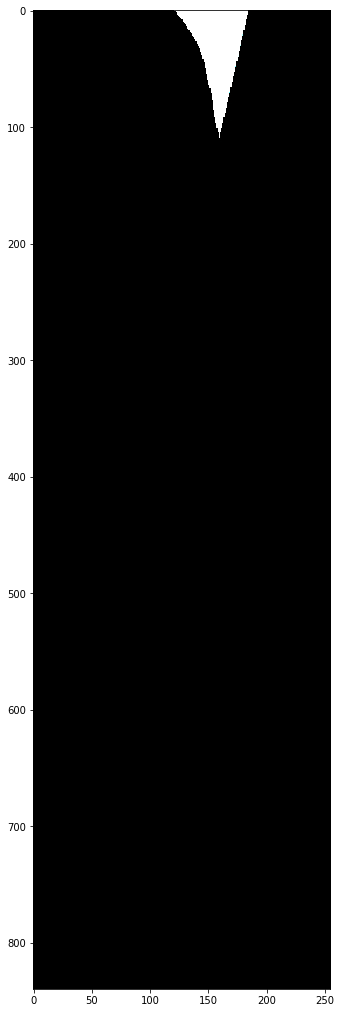

<function matplotlib.pyplot.show(*args, **kw)>

In [48]:
msk = rio.open(r'RGB_masked.tif')
fig, ax = plt.subplots(1, figsize=(18,18))
show(msk.read([1,2,3]))
plt.show

In [52]:
b4 = rio.open(R60+'/T34LFH_20200109T083321_B04_60m.jp2')
b8 = rio.open(R60+'/T34LFH_20200109T083321_B8A_60m.jp2')

In [53]:
red = b4.read()
nir = b8.read()

In [54]:
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

C:\Users\godzi\anaconda3\envs\BigTerra\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [55]:
meta = b4.meta

meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))